<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b>Factor Analysis</b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>January 25, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. What is a factor analysis
<hr style="height:1px;border:none" />

A **factor analysis** is similar to a PCA in a sense that it seeks a small number of factors to explain the data. However, conceptually a PCA and a factor analysis are different. While a PCA seeks to summarize the variability in a data with correlated features as uncorrelated principal components, a factor analysis tries to describe each of correlated features as a linear combination of a small number of uncorrelated variables, known as latent variables, or factors. In other words, the goal of a factor analysis is to describe the data with a small number of factors.

A factor analysis makes additional assumptions not in a PCA:
  * Latent variables are distributed as independent Gaussian random variables.
  * Latent variables have zero mean and unit variance.
  
To understand a factor analysis, let's take a look at a simple example.

# 2. Example
<hr style="height:1px;border:none" />

## Data
The data set for this example, **`wiscsem.txt`** consists of the Weschler Intelligence Scale for Children (WISC) of 175 children. There are 11 features in this data set.

 * `info`: Information
 * `comp`: Comprehension
 * `arith`: Arithmetic
 * `simil`: Similarities
 * `vocab`: Vocabulary
 * `digit`: Digit Span
 * `pictcomp`: Picture Completion
 * `parang`: Paragraph Arrangement
 * `block`: Block Design
 * `object`: Object Assembly
 * `coding`: Coding'
 
<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;"> 
Source: Tabachnick & Fidell, *Using Multivariate Statistics*, 6th Ed. Pearson.
http://media.pearsoncmg.com/ab/ab_tabachnick_multistats_6/datafiles/ASCII/wiscsem.dat </p>

Here is a code snippet to load the data.

`<WiscFA.py>`

In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

# loadin the data
wiscData = pd.read_csv('wiscsem.txt', sep='\t')
wiscFeatures = np.array(wiscData.iloc[:,2:13])
featureNames = np.array(wiscData.columns[2:13])

## Factor analysis

Like PCA, a factor analysis is a transformation object **`FactorAnalysis`** under **`sklern.decompositon`**. Now, we shall apply the factor analysis to the WISC data. Here, we do not specify the number of components, so that the maximum possible number of factors (equals to the number of features) will be determined.


In [9]:
# applying factor analysis
FA = FactorAnalysis()  # creating a factor analysis transformation object
wiscFA = FA.fit(wiscFeatures) # fit the data

Now, let's take a look at the results from this analysis. Like PCA, the factors are stored in **`FA.components_`**. 

In [10]:
FA.components_.shape

(11, 11)

Here, the rows corresponds to factors, and columns correspond to features. Let's take a look at the first factor, Factor 1. 

In [11]:
FA.components_[0,:]

array([ 2.10071154,  2.22649291,  1.26055822,  2.42251688,  2.17578256,
        1.07024014,  1.64726752,  1.10643563,  1.46536729,  1.30636613,
        0.23448759])

In [12]:
featureNames

array(['info', 'comp', 'arith', 'simil', 'vocab', 'digit', 'pictcomp',
       'parang', 'block', 'object', 'coding'], dtype=object)

These numbers are called **loadings** or ** factor loadings**. Each of these numbers represent how much Factor 1 contributes to a feature. For example, the factor loading corresponding to feature **`info`** is 2.10. This means 2.10$\times$Factor 1 is the contribution from Factor 1 to `info`. The larger the loading, then the larger the contribution from the corresponding Factor.

## Scree plot

Now, in the earlier factor analysis, we calculated as many factors as we were able to. But we would like to have as few factors as possible. To determine the number of required factors, we generate a Scree plot, just as in a PCA. Unlike a PCA, we plot **eigenvalues** associated with each factor on the y-axis, and the component number on the x-axis. The eigenvalue of a factor can be calculated by squaring all the factor loadings associated with that factor, and summing them together. Here is a code to calculate eigenvalues and produce a Scree plot.

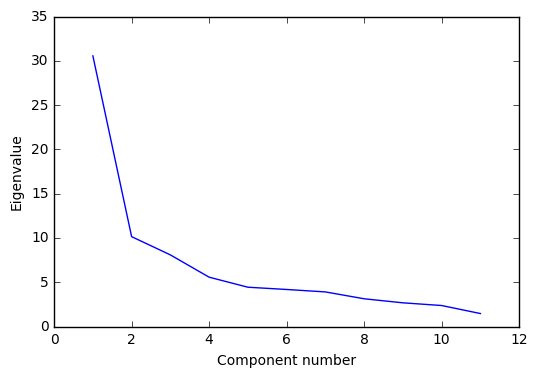

In [13]:
# Scree plot
eigenV = np.sum(FA.components_**2, axis=1)
plt.plot(np.arange(1,12), eigenV)
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.show()

It seems that there is an *elbow* at Factor 2. So we re-run the factor analysis with just 2 components this time.

In [14]:
# applying factor analysis with 2 components only
reFA = FactorAnalysis(n_components=2)  # creating a factor analysis transformation object
wiscReFA = reFA.fit(wiscFeatures) # fit the data

And let's examine factor loadings.

In [15]:
# printing out the factor loading
print('Feature \tFactor 1\tFactor 2')
for i, iFeature in enumerate(featureNames):
    print('%-8s' % iFeature + '\t%8.3f' % reFA.components_[0,i]
          + '\t%8.3f' % reFA.components_[1,i])

Feature 	Factor 1	Factor 2
info    	   2.167	   0.834
comp    	   2.086	  -0.288
arith   	   1.268	   0.422
simil   	   2.224	   0.001
vocab   	   2.186	   0.557
digit   	   0.999	   0.591
pictcomp	   1.402	  -1.184
parang  	   0.918	  -0.683
block   	   1.294	  -1.125
object  	   1.087	  -1.362
coding  	   0.198	   0.065


Here, Factor 1 seems contribute to `info`, `comp`, `arith`, `simil`, `vocab`, `pictcomp`, `block`, and `object`. On the other hand, Factor 2 seems to contribute negatively to `pictcomp`, `block`, and `object`. If you are an expert in the field, you can ascribe meanings to these factors based on the loadings.

# 3. Application
<hr style="height:1px;border:none" />

## Data
The data set consists of 32 personality trait ratings from 240 individuals. Our goal is to describe this data with a smaller number of factors.

<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;"> 
Source: https://web.stanford.edu/class/psych253/tutorials/FactorAnalysis.html </p>

Here is a code snippet to load the data from a file **`personality0.txt`**.

`<PersonalityFA.py>`

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

# loadin the data
pTraitData = pd.read_csv('personality0.txt', sep=' ')
numFeatures = 32

### Exercise
1. **Factor analysis**. Define a factor analysis transformation object, call it **`FA`**, with as many factors as possible. Then perform the factor analysis. 
2. **Scree plot**. Based on your analysis results from the factor analysis above, calculate eigenvalues for all the factors and produce a Scree plot. Determine the optimal number of factors based on the plot.

Once the number of components is determined, we can perform a factor analysis again, and examine factor loadings.

In [ ]:
# applying factor analysis again
numFactors = ### Fill in based on your answer to Exercise 2.
reFA = FactorAnalysis(n_components=numFactors)  # creating a factor analysis transformation object
pTraitReFA = reFA.fit(pTraitData) # fit the data

# printing out the factor loading
print('Feature  ', end='')
for iFactor in range(numFactors):
    print('\tFactor ' + str(iFactor+1), end='')
print()
for iFeature in range(numFeatures):
    print('%-8s' % pTraitData.columns[iFeature], end='')
    for iFactor in range(7):
        print('\t%8.3f' % reFA.components_[iFactor,iFeature], end='')
    print()